In [1]:
# Необходимые библиотеки
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [50]:
# Загружаем данные
df = pd.read_csv('D:\Desktop\machine\\task2\data.txt', names = ['ID','RI', 'NA2O', 'MGO', 'AL2O3', 'SIO2', 'K2O', 'CAO', 'BAO', 'FE2O3', 'TYPE'])

In [51]:
# Разбиваем на train и test
y = df['TYPE']
df = df.drop(['TYPE', 'ID'], axis=1)
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

In [53]:
# рассматриваем все параметры
i = 0
a_tree = []
a_knn = []
for i in range(1,15):
    tree = DecisionTreeClassifier(max_depth=i, random_state=16)
    knn = KNeighborsClassifier(n_neighbors=i)
    tree.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    tree_pred = tree.predict(X_holdout)
    a_tree.append(accuracy_score(y_holdout, tree_pred))
    knn_pred = knn.predict(X_holdout)
    a_knn.append(accuracy_score(y_holdout, knn_pred))

In [54]:
from matplotlib import pylab as plt
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [55]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sa

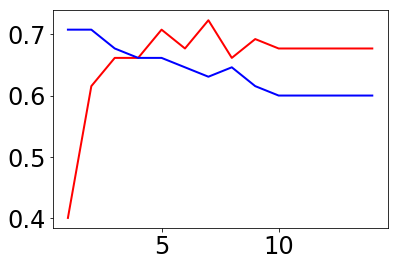

In [56]:
plt.plot( a,a_tree, 'r',  a,a_knn, 'b')
plt.show()

In [57]:
# результаты
print ('best accuracy of tree', max(a_tree), 'best param is', a_tree.index(max(a_tree)))
print ('best accuracy of knn', max(a_knn), 'best param is', a_knn.index(max(a_knn)))

best accuracy of tree 0.7230769230769231 best param is 6
best accuracy of knn 0.7076923076923077 best param is 0
